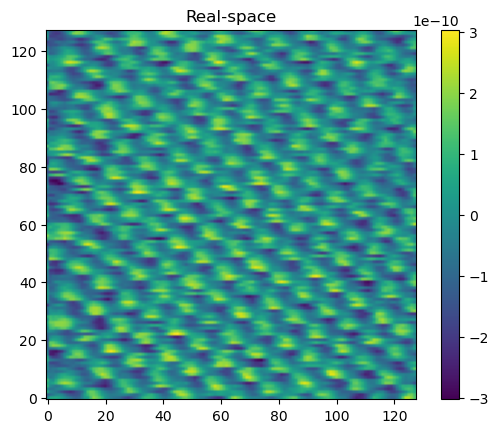

In [1]:
import matplotlib.pyplot as plt         # Für Plots
import numpy as np                      # Fürs Rechnen
from uncertainties import ufloat        # zahl = ufloat(nominal_value, std_devs)
import uncertainties.unumpy as unp      # wie ufloat nur mit arrays
from scipy.optimize import curve_fit    # params, cov = curve_fit(fitfunktion, x-wert, y-wert, cov=True)
import scipy.constants as constants         # z.B. h = constants.h für planckzahl
import numpy.fft as fft
from skimage.feature import peak_local_max


# --- load (your values) ---
data_1 = np.genfromtxt("data/4.csv", delimiter=";")
pxs = data_1.shape[0]         # image size (pixels; assume square)
scale = 2.31                  # total scan size in nm (IMPORTANT: total scan, not nm/pixel)
fac = scale / pxs    # nm per real-space pixel

# --- show real-space image (optional) ---
plt.imshow(data_1, origin="lower")
plt.title("Real-space")
plt.colorbar()
plt.show()


Detected peaks (row, col):
 [[51 56]
 [77 72]
 [47 69]
 [81 59]]


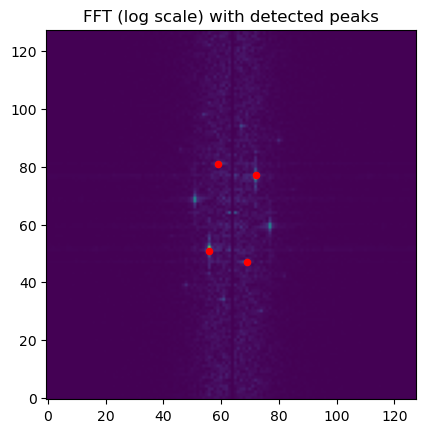

0.003714273864606285 0.008336735338115209 0.0037609705869460866 0.003760970586946086 0.003199536426176084


In [2]:

# --- FFT pipeline (as you had it) ---
f_data_1 = fft.ifftshift(data_1)
f_data_1 = fft.fft2(f_data_1)
f_data_1 = fft.fftshift(f_data_1)
f_data_1 = np.abs(f_data_1)

# --- detect peaks in FFT magnitude ---
peaks = peak_local_max(f_data_1, min_distance=5, threshold_rel=0.50, num_peaks=8)
print("Detected peaks (row, col):\n", peaks)

# --- plot FFT and peaks to visually inspect ---
plt.imshow(np.log1p(f_data_1), origin="lower")   # log-scale makes weaker peaks visible
plt.scatter(peaks[:,1], peaks[:,0], c="red", s=20)
plt.title("FFT (log scale) with detected peaks")
plt.show()

d01 = np.sqrt((peaks[0,0]/fac-peaks[1,0]/fac)**2 + (peaks[0,1]/fac-peaks[1,1]/fac)**2)
d02 = np.sqrt((peaks[0,0]/fac-peaks[2,0]/fac)**2 + (peaks[0,1]/fac-peaks[2,1]/fac)**2)
d03 = np.sqrt((peaks[0,0]/fac-peaks[3,0]/fac)**2 + (peaks[0,1]/fac-peaks[3,1]/fac)**2)

d12 = np.sqrt((peaks[1,0]/fac-peaks[2,0]/fac)**2 + (peaks[1,1]/fac-peaks[2,1]/fac)**2)
d23 = np.sqrt((peaks[3,0]/fac-peaks[2,0]/fac)**2 + (peaks[3,1]/fac-peaks[2,1]/fac)**2)

print(2*np.pi/d01, 2*np.pi/d02, 2*np.pi/d03, 2*np.pi/d12, 2*np.pi/d23)

